<a href="https://colab.research.google.com/github/aksaini175/Cognifyz-Internship-Level-2/blob/main/TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [25]:
df = pd.read_csv('/Dataset .csv')


Identify if There Are Any Restaurant Chains Present in The **Dataset**

In [26]:
import pandas as pd


df.columns = df.columns.str.strip()

df = df.dropna(subset=['Restaurant Name'])

restaurant_chains = df['Restaurant Name'].value_counts()

restaurant_chains.head(10)


,count
Restaurant Name,
Cafe Coffee Day,83
Domino's Pizza,79
Subway,63
Green Chick Chop,51
McDonald's,48
Keventers,34
Pizza Hut,30
Giani,29
Baskin Robbins,28


In [27]:

restaurant_chains = df['Restaurant Name'].value_counts()

restaurant_chains = restaurant_chains[restaurant_chains > 1]

restaurant_chains.head(10)


,count
Restaurant Name,
Cafe Coffee Day,83
Domino's Pizza,79
Subway,63
Green Chick Chop,51
McDonald's,48
Keventers,34
Pizza Hut,30
Giani,29
Baskin Robbins,28


In [28]:

restaurant_chains = df['Restaurant Name'].value_counts()
restaurant_chains = restaurant_chains[restaurant_chains > 1]

print("Top 10 Restaurant Chains by Number of Locations:")
print(restaurant_chains.head(10))


Top 10 Restaurant Chains by Number of Locations:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


Analyze The Ratings and Popularity of Different Restaurant Chains
**bold text**

In [29]:

df.columns = df.columns.str.strip()


restaurant_chains = df['Restaurant Name'].value_counts()
restaurant_chains = restaurant_chains[restaurant_chains > 1]

chain_data = df[df['Restaurant Name'].isin(restaurant_chains.index)]

chain_data.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.9,Dark Green,Excellent,1070
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.8,Dark Green,Excellent,294
35,6601589,Coco Bambu,30,Bras�_lia,"Bras�_lia Shopping - Piso 2, SCN 5, Bloco A, A...","Bras�_lia Shopping, Asa Norte","Bras�_lia Shopping, Asa Norte, Bras�_lia",-47.889000,-15.786500,International,...,Brazilian Real(R$),No,No,No,No,4,4.2,Green,Very Good,17
39,6600427,Coco Bambu,30,Bras�_lia,"SCES, Trecho 2, Conjunto 13/36, Setor de Clube...",Setor De Clubes Esportivos Sul,"Setor De Clubes Esportivos Sul, Bras�_lia",-47.868500,-15.819000,International,...,Brazilian Real(R$),No,No,No,No,4,4.9,Dark Green,Excellent,30


In [30]:
import pandas as pd


df.columns = df.columns.str.strip()

df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

restaurant_chains = df['Restaurant Name'].value_counts()
restaurant_chains = restaurant_chains[restaurant_chains > 1]

chain_data = df[df['Restaurant Name'].isin(restaurant_chains.index)]

chain_stats = (
    chain_data
    .groupby('Restaurant Name')
    .agg(
        average_rating=('Aggregate rating', 'mean'),
        total_votes=('Votes', 'sum')
    )
    .sort_values(by='average_rating', ascending=False)
)

chain_stats.head(10)


,average_rating,total_votes
Restaurant Name,,
Talaga Sampireun,4.900,5514
Silantro Fil-Mex,4.850,1364
AB's Absolute Barbecues,4.850,3151
AB's - Absolute Barbecues,4.825,13400
Naturals Ice Cream,4.800,3094
Gymkhana,4.700,328
The Cheesecake Factory,4.650,3010
Garota de Ipanema,4.600,59
Dishoom,4.600,1269


In [32]:
import pandas as pd

# Clean column names
df.columns = df.columns.str.strip()

# Ensure numeric columns
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Identify restaurant chains
restaurant_chains = df['Restaurant Name'].value_counts()
restaurant_chains = restaurant_chains[restaurant_chains > 1]

# Filter chain data
chain_data = df[df['Restaurant Name'].isin(restaurant_chains.index)]

# Calculate average ratings and total votes
chain_ratings = chain_data.groupby('Restaurant Name')['Aggregate rating'].mean()
chain_votes = chain_data.groupby('Restaurant Name')['Votes'].sum()

# Combine into a single DataFrame
chain_analysis = pd.DataFrame({
    "Average Rating": chain_ratings,
    "Total Votes": chain_votes
})

# Optional: sort by average rating
chain_analysis = chain_analysis.sort_values(by="Average Rating", ascending=False)

chain_analysis.head(10)


,Average Rating,Total Votes
Restaurant Name,,
Talaga Sampireun,4.900,5514
Silantro Fil-Mex,4.850,1364
AB's Absolute Barbecues,4.850,3151
AB's - Absolute Barbecues,4.825,13400
Naturals Ice Cream,4.800,3094
Gymkhana,4.700,328
The Cheesecake Factory,4.650,3010
Garota de Ipanema,4.600,59
Dishoom,4.600,1269


In [33]:
# Ensure chain_analysis exists
top_rated_chains = chain_analysis.nlargest(10, "Average Rating")

print("\nTop 10 Highest-Rated Restaurant Chains:")
print(top_rated_chains.round(2))



Top 10 Highest-Rated Restaurant Chains:
                           Average Rating  Total Votes
Restaurant Name                                       
Talaga Sampireun                     4.90         5514
Silantro Fil-Mex                     4.85         1364
AB's Absolute Barbecues              4.85         3151
AB's - Absolute Barbecues            4.82        13400
Naturals Ice Cream                   4.80         3094
Gymkhana                             4.70          328
The Cheesecake Factory               4.65         3010
Garota de Ipanema                    4.60           59
Dishoom                              4.60         1269
Chili's                              4.58         8156


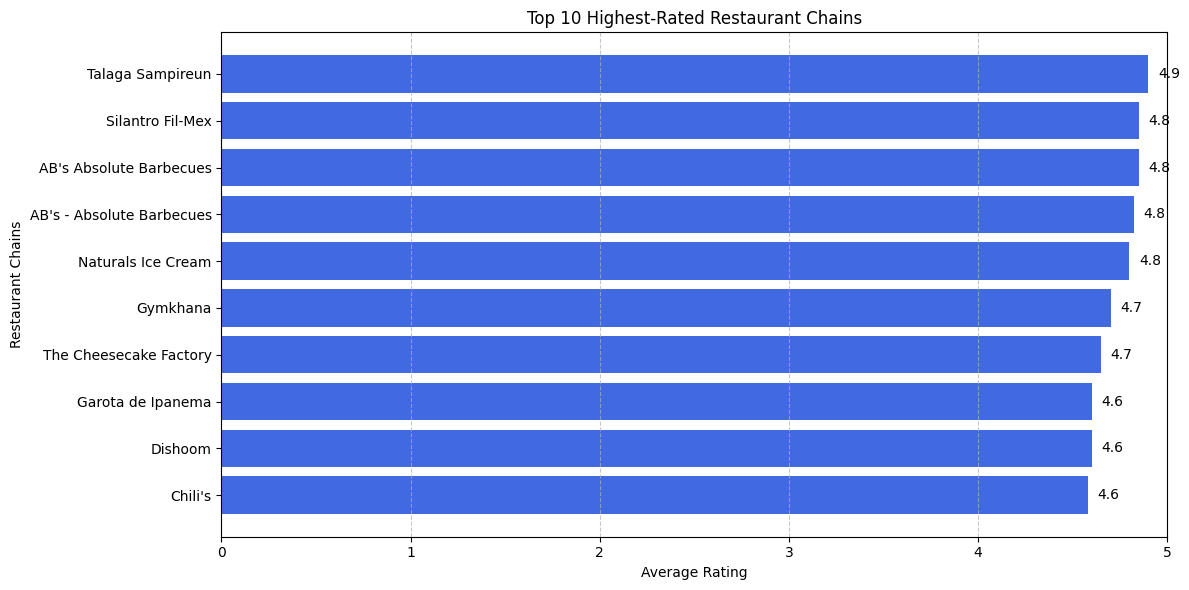

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Reverse order so highest appears at top
ratings = top_rated_chains["Average Rating"][::-1]

plt.barh(
    top_rated_chains.index[::-1],
    ratings,
    color="royalblue"
)

plt.xlabel("Average Rating")
plt.ylabel("Restaurant Chains")
plt.title("Top 10 Highest-Rated Restaurant Chains")
plt.xlim(0, 5)  # Ratings scale
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Display values on bars
for index, value in enumerate(ratings):
    plt.text(value + 0.05, index, f"{value:.1f}", va="center", fontsize=10)

plt.tight_layout()
plt.show()


In [35]:
# Get the top 10 most popular chains based on total votes
top_popular_chains = chain_analysis.nlargest(10, "Total Votes")

print("\nTop 10 Most Popular Restaurant Chains by Total Votes:")
print(top_popular_chains)



Top 10 Most Popular Restaurant Chains by Total Votes:
                           Average Rating  Total Votes
Restaurant Name                                       
Barbeque Nation                  4.353846        28142
AB's - Absolute Barbecues        4.825000        13400
Big Chill                        4.475000        10853
Farzi Cafe                       4.366667        10098
Truffles                         3.950000         9682
Chili's                          4.580000         8156
Joey's Pizza                     4.250000         7807
Big Yellow Door                  4.266667         7511
Saravana Bhavan                  4.133333         7238
Starbucks                        3.805556         7139


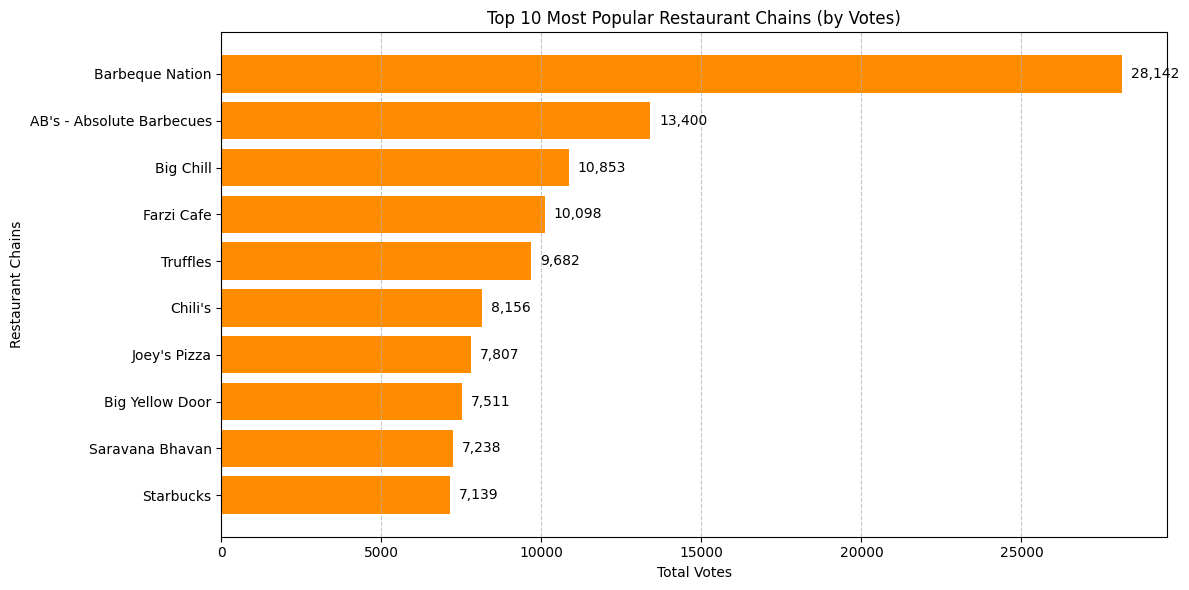

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

votes = top_popular_chains["Total Votes"][::-1]

plt.barh(
    top_popular_chains.index[::-1],
    votes,
    color="darkorange"
)

plt.xlabel("Total Votes")
plt.ylabel("Restaurant Chains")
plt.title("Top 10 Most Popular Restaurant Chains (by Votes)")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Display values on bars
for index, value in enumerate(votes):
    plt.text(value + (votes.max() * 0.01), index, f"{int(value):,}", va="center", fontsize=10)

plt.tight_layout()
plt.show()
